### Problem 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('anscombe.npy')
data.shape

(11, 8)

In [3]:
def plot_ansc():
    sections = np.arange(7, step=2)
    tits = ['1)', '2)', '3)', '4)']
    for i in range(len(sections)):
        k = sections[i]
        x = data[:,k]
        y = data[:, k+1]
        reg_line = 0.5 * x + 3

        plt.subplot(2,2,i+1)
        plt.plot(x, y, '*')
        plt.plot(x, reg_line, '--', color='k', lw=0.5)
        plt.title(tits[i])
    
    plt.tight_layout()
    plt.show()

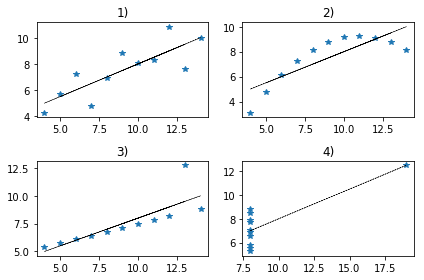

In [4]:
plot_ansc()

#### 1)
The data points seem to be quite evenly distributed around the regressin line.

#### 2)
Clearly the functional form is not linear as assumend by the least squares line.

#### 3)
This illustrates the problem of outliers with high "leverage". The one upper point is pulling slope of the regresion line up.

#### 4)
This is the truncation problem. Clearly x is truncated at 8.

### Problem 2.

In [112]:
from scipy import special

def poly(n, v):
    x = np.linspace(0, 1, 50)
    bi_coef = special.binom(n, v)
    res = bi_coef * x ** v * (1-x) ** (n-v)
    
    return res

def pb(n_max, v_max):
    v = np.arange(v_max+1)
    x = np.linspace(0, 1, 50)
    num_subplots = [[1], [5, 6,],[9, 10, 11], [13, 14, 15 ,16]]
    plt.figure(figsize=(8,8))
    for i in range(len(v)):
        n = np.arange(i+1)
        cols = num_subplots[i]
        for j in range(len(n)):
            res = poly(n=n[i], v=v[j])
            this_plot_num = (cols[j])
            plt.subplot(n_max+1,v_max+1,this_plot_num)
            plt.plot(x, res)
            plt.axis([0, 1,0,1])
            plt.title(r'$n={}, v={}$'.format(n[i], v[j]))
            if not this_plot_num in num_subplots[3]:
                plt.tick_params(labelbottom='off',
                               bottom='off')
            if not this_plot_num in [1, 5, 9, 13]:
                plt.tick_params(labelleft='off',
                               left='off')                
    
    plt.tight_layout()
    plt.show()

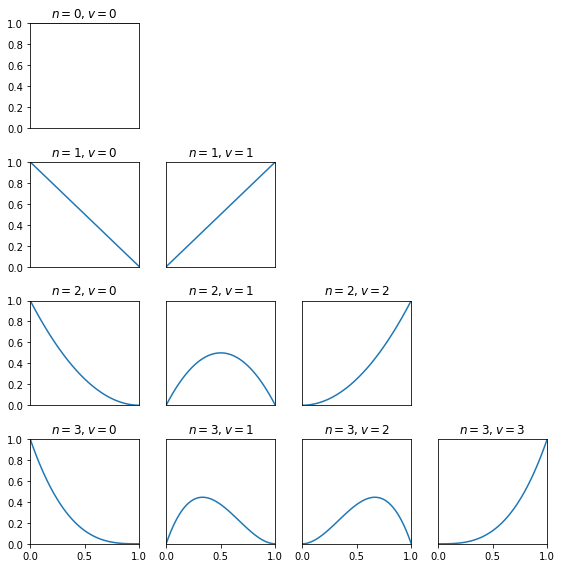

In [114]:
pb(n_max=3, v_max=3)

### Prombel 3.

In [163]:
from numpy.linalg import lstsq

mlb = np.load('MLB.npy')

def plot_mlb():
    
    plt.figure(figsize=(6,8))
    
    plt.subplot(3,1,1)
    plt.title('height vs. weight')
    plt.xlabel('[inch]')
    plt.ylabel('[pounds]')
    plt.plot(mlb[:,0], mlb[:,1], 'o', alpha=0.3)
    plt.grid()
    
    plt.subplot(3,1,2)
    plt.title('weight vs age')
    plt.ylabel('[years]')
    plt.xlabel('[pounds]')
    plt.plot(mlb[:,1], mlb[:,2], 'o', alpha=0.2)
    plt.grid()
    
    plt.subplot(3,1,3)
    plt.title('height vs. age')
    plt.xlabel('[inch]')
    plt.ylabel('[age]')
    plt.plot(mlb[:,0], mlb[:,2], 'o', alpha=0.3)
    plt.grid()
    
    plt.tight_layout()
    plt.show()  
        
        

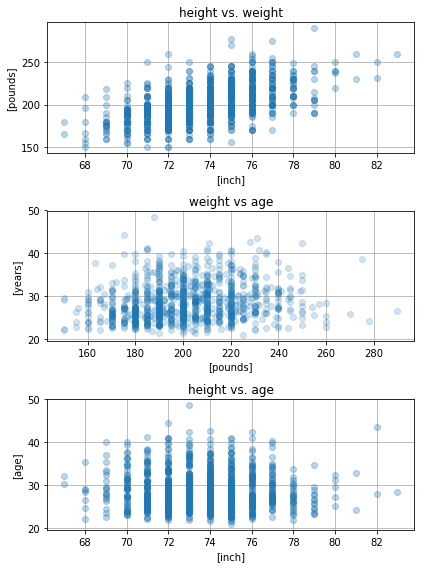

In [166]:
plot_mlb()

### Problem 4.

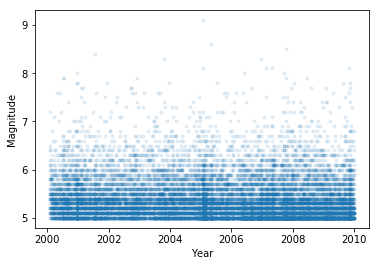

In [204]:
year, magnitude, longitude, latitude = np.load("earthquakes.npy").T
plt.plot(year, magnitude, '.', alpha=0.1)
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.show()

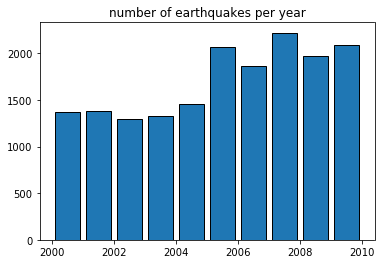

In [201]:
year_int = sorted(list((year.astype(int))))
plt.hist(year_int, bins=10, range=(2000, 2010), rwidth=0.8, edgecolor='k')
plt.title('number of earthquakes per year')
plt.show()

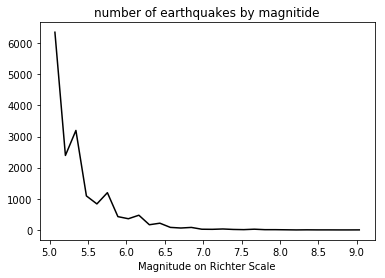

In [254]:
magns =  sorted(list(set(magnitude)))
num_magns = [list(magnitude).count(m) for m in magns]

plt.title('number of earthquakes by magnitide')
plt.xlabel('Magnitude on Richter Scale')
freq, bin_edges = np.histogram(magnitude, bins=30)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
plt.plot(bin_centers, freq, 'k-')
plt.show()

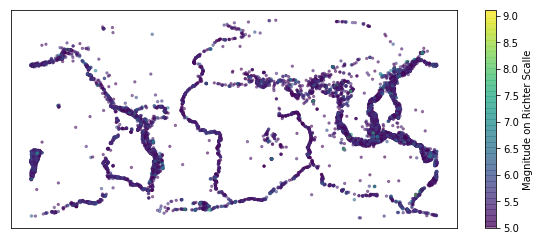

In [264]:
plt.figure(figsize=(10,4))
plt.scatter(longitude, latitude, c=magnitude, alpha=0.5, s=magnitude)
cbar = plt.colorbar()
cbar.set_label('Magnitude on Richter Scalle')
plt.tick_params(axis='both', bottom='off', left='off', labelbottom='off',
                labelleft='off')
plt.show()
#plt.pcolormesh(X, Y, magnitude)

### Problem 5.


In [273]:
def rosenbrock(X, Y):
    f = (1 - X)**2 + 100 * (Y - X**2) **2
    return f

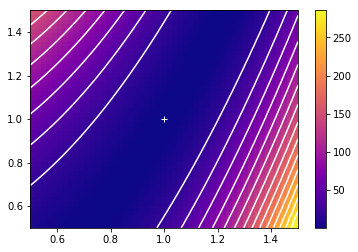

In [310]:
from matplotlib.colors import LogNorm
start = 0.5
end = 1.5
X = np.linspace(start, end, 50)
Y = X.copy()
A, B = np.meshgrid(X, Y)
rb = rosenbrock(A, B)
lines = list(np.arange(0, 300, step=20))
plt.contour(A, B, rb, lines, colors='white', lw=0.1)
plt.pcolormesh(A, B, rb, cmap='plasma')
plt.plot(1,1, 'w+')
plt.colorbar()
plt.show()


### Problem 6.

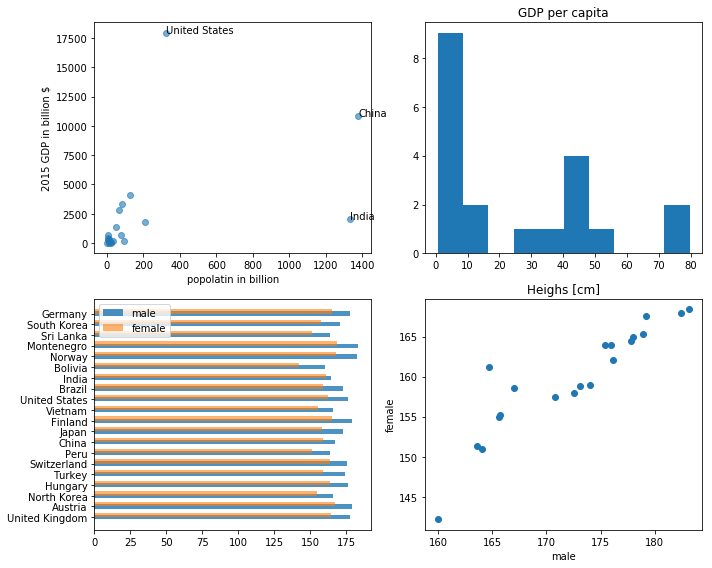

In [368]:
data = np.load('countries.npy')
pop, gdp, mh, fh = data[:,0], data[:,1], data[:,2], data[:,3]
countries = ["Austria", "Bolivia", "Brazil", "China",
    "Finland", "Germany", "Hungary", "India",
    "Japan", "North Korea", "Montenegro", "Norway",
    "Peru", "South Korea", "Sri Lanka", "Switzerland",
    "Turkey", "United Kingdom", "United States", "Vietnam"]

gdp_pp = gdp / pop

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.scatter(pop, gdp, alpha=0.6)
for i in [3, 7, 18]:
    plt.annotate(countries[i], (pop[i], gdp[i]))
plt.xlabel('popolatin in billion')
plt.ylabel('2015 GDP in billion $')

plt.subplot(2,2,2)
plt.title('GDP per capita')
plt.hist(gdp_pp)


plt.subplot(2,2,3)
positions = np.argsort(mh)
#positions = np.arange(len(countries))
plt.barh(positions, mh, 0.4,  align="center", label='male', alpha=0.8)
plt.barh(positions+0.2, fh, 0.4, label='female', alpha=0.6)
plt.yticks(positions, countries)
plt.legend(loc='upper left')

plt.subplot(2,2,4)
plt.title('Heighs [cm]')
plt.scatter(mh, fh )
plt.xlabel('male')
plt.ylabel('female')

plt.tight_layout()
plt.show()


